In [134]:
# CODTECH Internship Task-3
## End to End Data Science Project Deployment
#Name:** Shaunak Damodar Sinai Kunde  
#Internship:** CodTech IT Solutions Pvt Ltd  
#Task:** Data Preprocessing, Transformation & Loading (ETL) Pipeline

In [135]:
#Step 1: Install Necessary Libraries

In [136]:
pip install pandas openpyxl matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [137]:
#Step 2: Load and Prepare the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the full file paths for the two Excel files
may_file_path = "C://Users//kunde//Desktop//Virtual internship//CodTech IT Solutions Pvt Ltd//CodTech IT Solutions Pvt Ltd Internship//Task-3 End to end Data Science Project//Goa Power Outage Report May 2025.xlsx"
june_file_path = "C://Users//kunde//Desktop//Virtual internship//CodTech IT Solutions Pvt Ltd//CodTech IT Solutions Pvt Ltd Internship//Task-3 End to end Data Science Project//Goa Power Outage Report June 2025.xlsx"

# Load the datasets
df_may = pd.read_excel(may_file_path)
df_june = pd.read_excel(june_file_path)

# In-place data preprocessing step: Replace 'MARMAGAO' with 'VASCO'
df_may['Town Name'] = df_may['Town Name'].replace('MARMAGAO', 'VASCO')
df_june['Town Name'] = df_june['Town Name'].replace('MARMAGAO', 'VASCO')
df_combined = pd.concat([df_may, df_june], ignore_index=True)

In [138]:
df_may.head()

,Sl No,Town Name,Substation,Feeder Name,Feeder Code,Rural/Urban,No_of_Consumers,No_of_Outages,Duration_of_Outage_Sec,Average_Hours_of_Steady_Supply,Reason for power disruptions
0,1,MAPUSA,220/33KV Thivim,11KV Tivim,1S03-1108,RURAL,NaN,0,0.0,24:00:00,NaN
1,2,MAPUSA,33KV Nagoa,11KV Arpora,1S07-1105,RURAL,2209.0,0,0.0,24:00:00,NaN
2,3,PANJIM,33KV EDC,11KV Kanaka,2S02-1107,URBAN,NaN,0,0.0,24:00:00,NaN
3,4,PANJIM,33KV Bambolim,11KV Santacruz,2S05-1105,RURAL,3673.0,0,0.0,24:00:00,NaN
4,5,PANJIM,33KV Nagali hills(IT\nPark),11KV MANIPAL,2S07-1106,URBAN,2.0,0,0.0,24:00:00,NaN


In [139]:
df_june.head()

,Sl No,Town Name,Substation,Feeder Name,Feeder Code,Rural/Urban,No_of_Consumers,No_of_Outages,Duration_of_Outage_Sec,Average_Hours_of_Steady_Supply,Reason for power disruptions
0,1,MAPUSA,220/33KV\nThivim,11KV Thivim Village,1S03-1105,RURAL,3173.0,9,21960.0,23:47:48.019000,1)Trip on O/C E/F pulled incomer II\n2)Manual...
1,2,MAPUSA,33KV\nBicholim,11KV MAYEM,1S05-1107,RURAL,756.0,30,57300.0,23:28:10.042000,"planned shutdown, O/C, E/F, falling of trees/b..."
2,3,MAPUSA,33KV\nSanquelim,11KV\nSanquelim,1S08-1102,URBAN,1599.0,0,0.0,24:00:00,NaN
3,4,MAPUSA,33KV\nPorvorim,11KV Porvorim Bazar,1S09-1109,RURAL,1849.0,5,4260.0,23:57:37.958000,"E/f, Guarding snapped, Jumper opened etc."
4,5,MAPUSA,33KV\nPorvorim,Audit bhavan,1S09-1112,URBAN,NaN,0,0.0,24:00:00,NaN


In [140]:
#Step 3: Clean the Data
# Clean column names
df_may.columns = df_may.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.replace('"', '').str.replace('/', '_').str.replace('(', '').str.replace(')', '')
# Convert key columns to numeric format
numeric_cols = ['No_of_Consumers', 'No_of_Outages', 'Duration_of_Outage_Sec', 'Average_Hours_of_Steady_Supply']
for col in numeric_cols:
    df_may[col] = pd.to_numeric(df_may[col], errors='coerce')
# Drop rows with missing values in critical columns
df_may.dropna(subset=['No_of_Outages', 'Duration_of_Outage_Sec'], inplace=True)

# --- Clean June Data ---
# Clean column names
df_june.columns = df_june.columns.str.strip().str.replace(' ', '_').str.replace('.', '').str.replace('"', '').str.replace('/', '_').str.replace('(', '').str.replace(')', '')
# Convert key columns to numeric format
for col in numeric_cols:
    df_june[col] = pd.to_numeric(df_june[col], errors='coerce')
# Drop rows with missing values in critical columns
df_june.dropna(subset=['No_of_Outages', 'Duration_of_Outage_Sec'], inplace=True)

print("Data cleaning complete. The May and June datasets are ready for analysis.")

Data cleaning complete. The May and June datasets are ready for analysis.


C:\Users\kunde\AppData\Local\Temp\ipykernel_22572\118064136.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=town_outages_combined.index, y=town_outages_combined.values, palette='viridis')


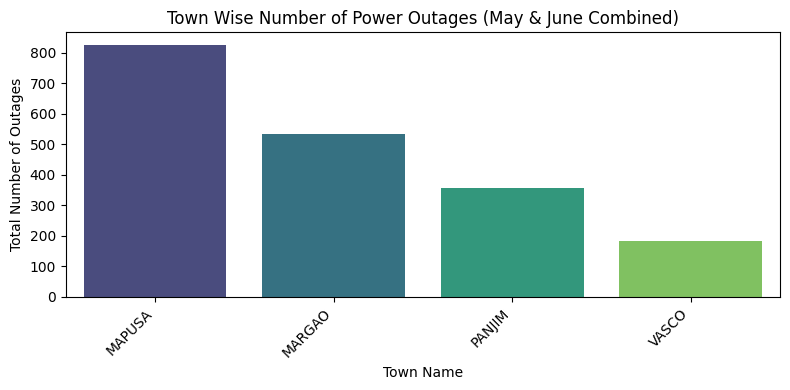

In [ ]:
#Step 4: Comparative Analysis and Visualizations
# viz 1. Bar chart showing No_of_Outages vs Town Name (combined)
town_outages_combined = df_combined.groupby('Town Name')['No_of_Outages'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=town_outages_combined.index, y=town_outages_combined.values, palette='viridis')
plt.title('Town Wise Number of Power Outages (May & June Combined)')
plt.xlabel('Town Name')
plt.ylabel('Total Number of Outages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

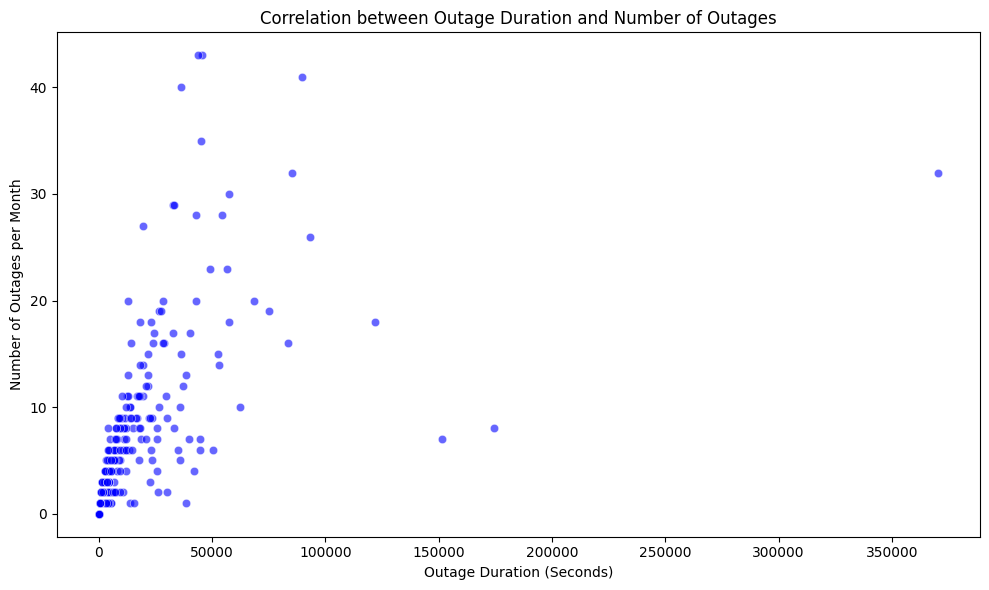

In [ ]:
# viz 2. Scatter plot showing Correlation between Duration of Outages and No of Outages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_of_Outage_Sec', y='No_of_Outages', data=df_combined, alpha=0.6, color='b')
plt.title('Correlation between Outage Duration and Number of Outages')
plt.xlabel('Outage Duration (Seconds)')
plt.ylabel('Number of Outages per Month')
plt.tight_layout()
plt.show()


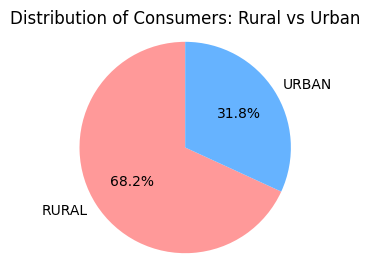

In [ ]:
# viz 3. Pie chart showing No of Consumers in Rural vs Urban
rural_urban_consumers = df_combined.groupby('Rural/Urban')['No_of_Consumers'].sum().dropna()
plt.figure(figsize=(3, 3))
plt.pie(rural_urban_consumers, labels=rural_urban_consumers.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Consumers: Rural vs Urban')
plt.axis('equal') # Ensures the pie chart is circular
plt.show()


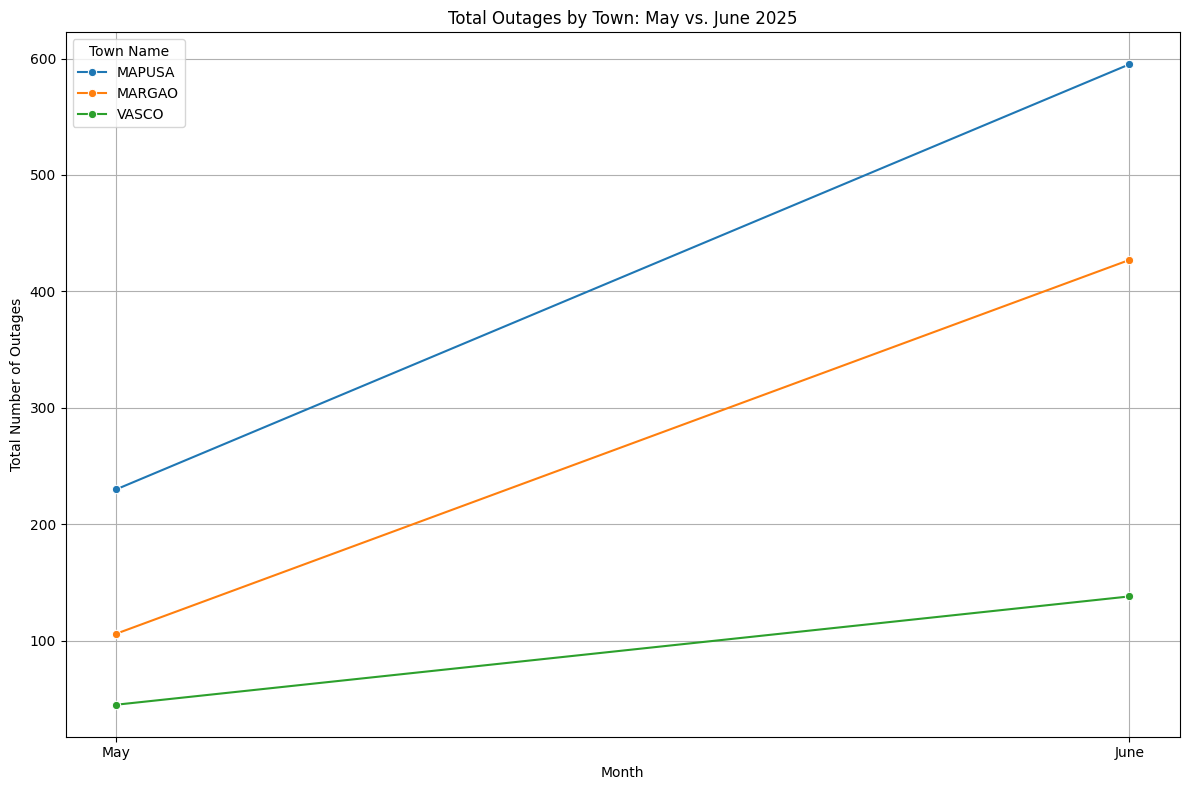

In [162]:
# viz 4. May vs June 2025 power outages for each town
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df_may and df_june are your preprocessed dataframes

# Define the towns you want to include in the plot
towns_to_plot = ['MARGAO', 'VASCO', 'MAPUSA', 'PANAJI']

# Filter data for the specific towns and add a 'month' column
df_may_filtered = df_may[df_may['Town_Name'].isin(towns_to_plot)].copy()
df_may_filtered['month'] = 'May'

df_june_filtered = df_june[df_june['Town_Name'].isin(towns_to_plot)].copy()
df_june_filtered['month'] = 'June'

# Combine the filtered dataframes
df_combined_plot = pd.concat([df_may_filtered, df_june_filtered], ignore_index=True)

# Group the data to get the total outages for each town in each month
df_plot = df_combined_plot.groupby(['Town_Name', 'month'])['No_of_Outages'].sum().reset_index()

# Sort the months to ensure May comes before June on the x-axis
df_plot['month'] = pd.Categorical(df_plot['month'], categories=['May', 'June'], ordered=True)
df_plot = df_plot.sort_values('month')

# Plot the line chart with each town as a separate line
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='No_of_Outages', hue='Town_Name', data=df_plot, marker='o')
plt.title('Total Outages by Town: May vs. June 2025')
plt.xlabel('Month')
plt.ylabel('Total Number of Outages')
plt.grid(True)
plt.legend(title='Town Name')
plt.tight_layout()
plt.show()

C:\Users\kunde\AppData\Local\Temp\ipykernel_22572\3583799911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons_may.values, y=truncated_reasons, palette='Reds_d')


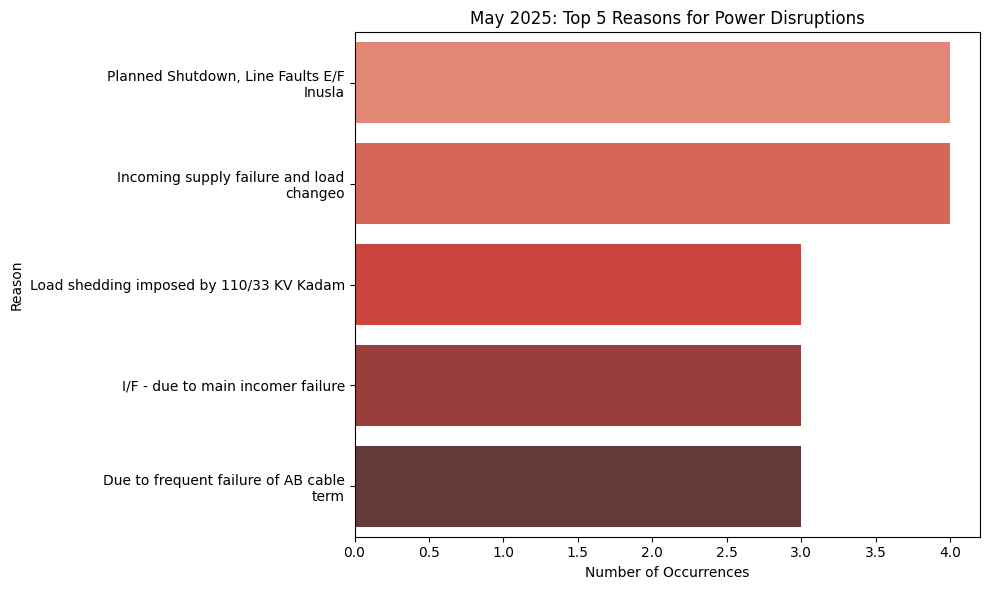

In [165]:
# viz 5. Bar chart for top 5 Reason for power disruptions in May
if not df_may.empty:
    top_reasons_may = df_may['Reason_for_power_disruptions'].value_counts().head(5)
    
    # Truncate the reason strings to the first 40 characters
    truncated_reasons = [reason[:40] for reason in top_reasons_may.index]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_reasons_may.values, y=truncated_reasons, palette='Reds_d')
    plt.title('May 2025: Top 5 Reasons for Power Disruptions')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Reason')
    plt.tight_layout()
    plt.show()
else:
    print("May data is empty. Cannot generate plot for top reasons.")

C:\Users\kunde\AppData\Local\Temp\ipykernel_22572\606047602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons_june.values, y=truncated_reasons, palette='Blues_d')


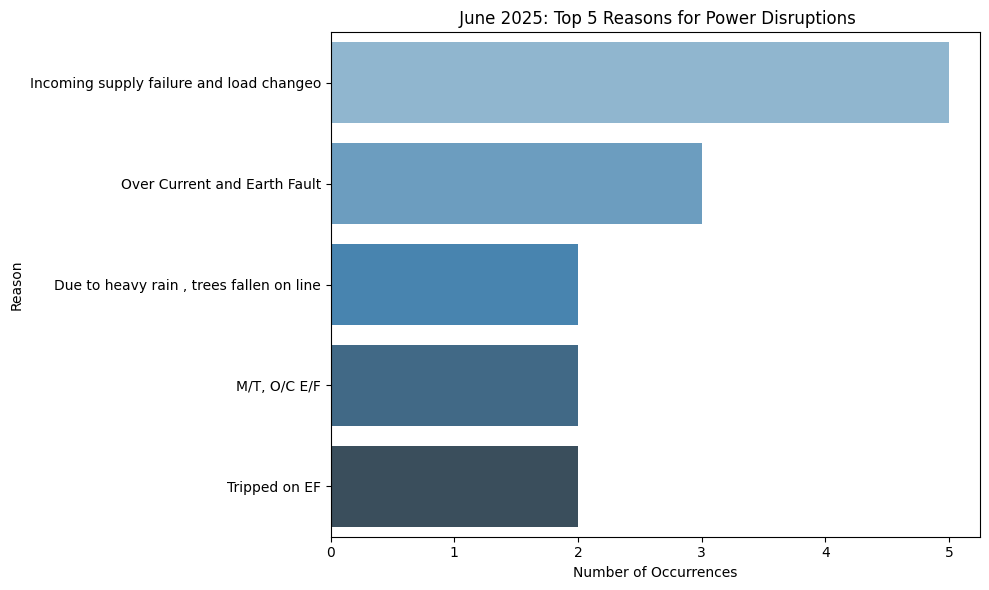

In [166]:
# viz 6. Bar chart for top 5 Reason for power disruptions in June
if not df_june.empty:
    top_reasons_june = df_june['Reason_for_power_disruptions'].value_counts().head(5)
    
    # Truncate the reason strings to the first 40 characters
    truncated_reasons = [reason[:40] for reason in top_reasons_june.index]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_reasons_june.values, y=truncated_reasons, palette='Blues_d')
    plt.title(' June 2025: Top 5 Reasons for Power Disruptions')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Reason')
    plt.tight_layout()
    plt.show()
else:
    print("June data is empty. Cannot generate plot for top reasons.")

C:\Users\kunde\AppData\Local\Temp\ipykernel_22572\2061811707.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Substation', y='Duration_of_Outage_Minutes', data=substation_outages, palette='plasma')


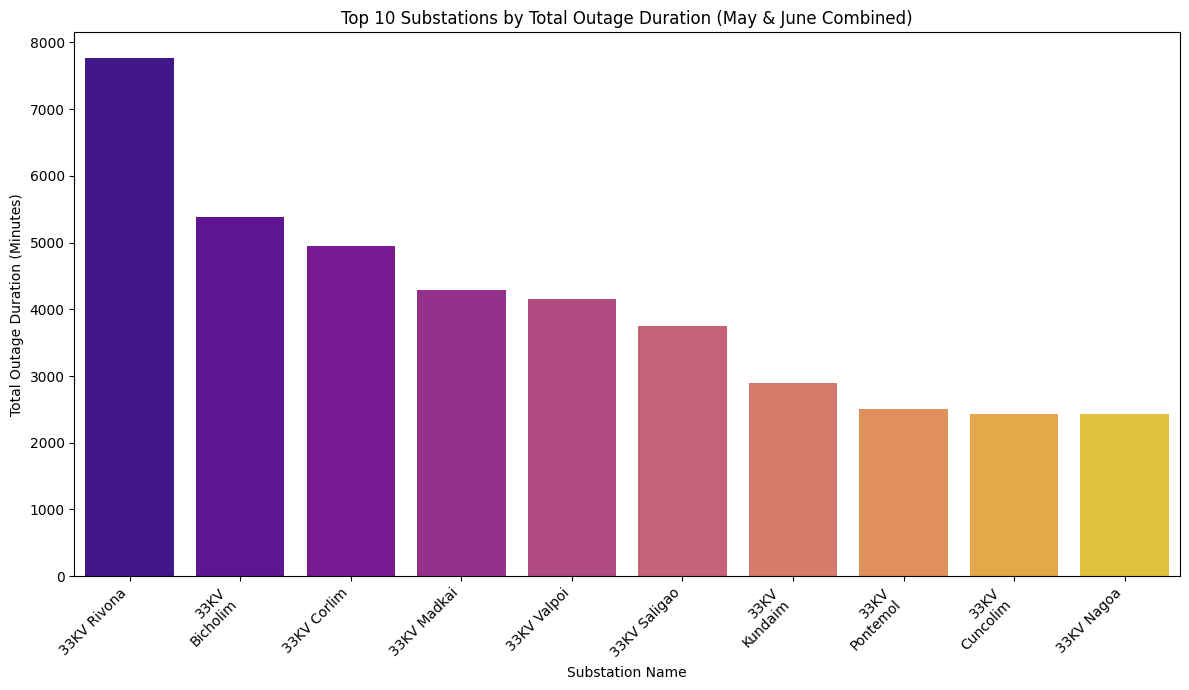

In [ ]:
# viz 7 plot Duration_of_Outage_Sec vs top 10 Substation for combined data
# Group by Substation and calculate the total duration of outages in minutes
substation_outages = df_combined.groupby('Substation')['Duration_of_Outage_Sec'].sum().nlargest(10).reset_index()
substation_outages['Duration_of_Outage_Minutes'] = substation_outages['Duration_of_Outage_Sec'] / 60

# Plot the bar chart for the top 5 substations
plt.figure(figsize=(12, 7))
sns.barplot(x='Substation', y='Duration_of_Outage_Minutes', data=substation_outages, palette='plasma')
plt.title('Top 10 Substations by Total Outage Duration (May & June Combined)')
plt.xlabel('Substation Name')
plt.ylabel('Total Outage Duration (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [172]:
#Step 5
# build a ML model that can predict whether
# duration of outage will be more than 1 hour or less than 1 hour
# based on other features like Town Name, Substation, Feeder Name, and Rural/Urban classification.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming df_combined is your preprocessed DataFrame from earlier steps
df_classification = df_combined.copy()

# Create the new binary target variable: 1 if duration > 3600 seconds, else 0
df_classification['is_long_outage'] = df_classification['Duration_of_Outage_Sec'].apply(lambda x: 1 if x > 3600 else 0)

# Feature Engineering: Convert categorical data into a format the model can understand
le = LabelEncoder()
df_classification['Town_Name_Encoded'] = le.fit_transform(df_classification['Town Name'])
df_classification['Substation_Encoded'] = le.fit_transform(df_classification['Substation'])
df_classification['Feeder_Name_Encoded'] = le.fit_transform(df_classification['Feeder Name'])
df_classification['Rural_Urban_Encoded'] = le.fit_transform(df_classification['Rural/Urban'])

# Define features (X) and target (y)
features = ['No_of_Consumers', 'Town_Name_Encoded', 'Substation_Encoded', 'Feeder_Name_Encoded', 'Rural_Urban_Encoded']
target = 'is_long_outage'

X = df_classification[features]
y = df_classification[target]

# Handle potential missing values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\kunde\AppData\Local\Temp\ipykernel_22572\788427543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        98
           1       0.56      0.23      0.32        40

    accuracy                           0.72       138
   macro avg       0.65      0.58      0.57       138
weighted avg       0.69      0.72      0.68       138

ROC-AUC Score: 0.6292091836734693


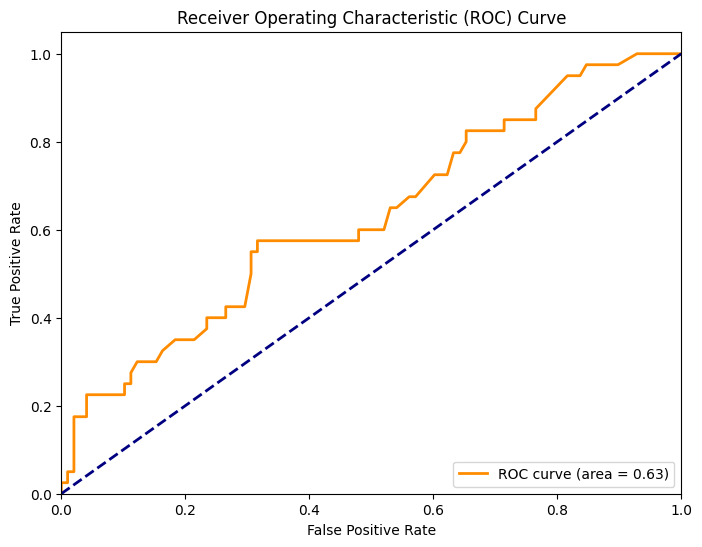

In [174]:
#Step 6_Model Building and Evaluation
# Initialize and train the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and get prediction probabilities
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

# Display the Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Calculate and display the ROC-AUC score
roc_auc = roc_auc_score(y_test, probabilities)
print(f"ROC-AUC Score: {roc_auc}")

# Plot the ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [175]:
#Step 7_ Saving the Trained Model 💾
import joblib

# Assuming your trained classification model is named 'model' from the previous step
joblib.dump(model, 'power_outage_classifier.pkl')

print("Classification model saved as power_outage_classifier.pkl")

Classification model saved as power_outage_classifier.pkl


In [ ]:
#Step_8_Building the Flask API for Deployment
#in the new app.py file